In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
spec = Veldis('../spectra_extraction/J0147_spectra/spec1d_J0147_coadd2d_deflector.fits', informat='fits',
              logwav=True,trimsec=[7000, 15470])


Reading spectrum from ../spectra_extraction/J0147_spectra/spec1d_J0147_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6396.63
 Spectrum End:     8824.50
 Dispersion (1st pixel):   0.24
 Dispersion (average):      0.29



In [3]:
np.mean(np.diff(spec['wav'])) / np.mean(spec.wav)*(299999)

11.397746626721515

In [5]:
%matplotlib notebook
spec.smooth(3)
spec.mark_lines('abs', z=0.678, usesmooth=True)
spec.mark_lines('em', z=0.678, usesmooth=True)

<IPython.core.display.Javascript object>


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       6435.13
CN bandhd     3883.00       6515.67
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76
Mg I (b)      5176.00       8685.33


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       6881.48
H-gamma       4340.00       7282.52
H-beta        4861.00       8156.76
[O III]       4962.00       8326.24
[O III]       5007.00       8401.75
[N I]         5199.00       8723.92



In [15]:
spec.closest_wavelength([(6400, 7500)])


Given waverange(assumed) : 

6400 7500

Closest waverange to the given ones : 

6400.0372248728 7499.86593219759


([(6400.0372248728, 7499.86593219759)], [(7014, 11188)])

In [5]:
spec.check_temp_coverage('../TEXT/100006.txt', z=0.678)


Covered range for redshift 0.678000 : 5814.270000 - 15888.982000


Velocity scale = 11.389900 km/s


<IPython.core.display.Javascript object>


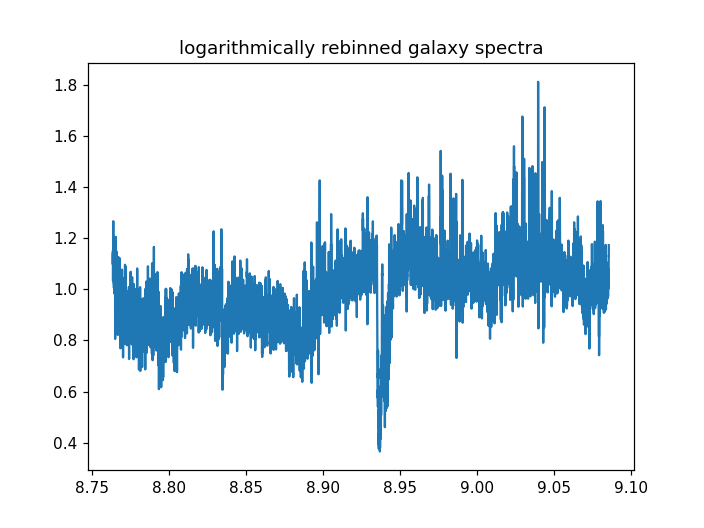

<IPython.core.display.Javascript object>


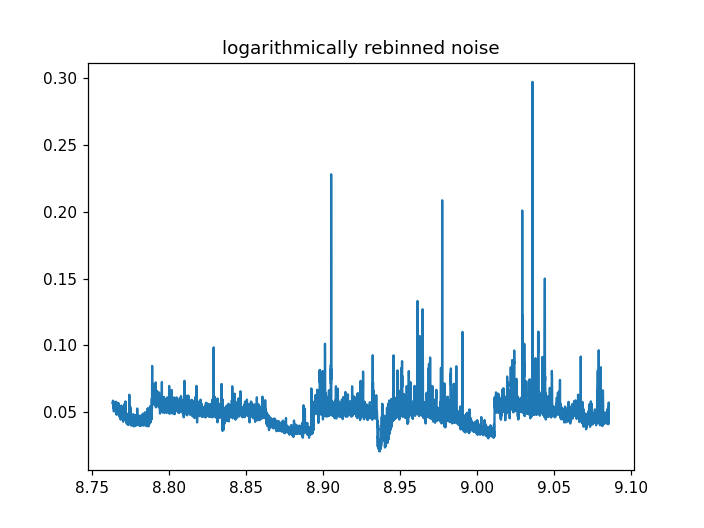

In [4]:
%matplotlib notebook
spec.cal_parm(z=0.678, norm=True, high_z=False, velscale=True)

In [7]:
mask_reg = [(8.7599, 8.7834),(8.8333, 8.8480), (8.9333, 8.9520)]
#(8.7599, 8.7742),(8.8282, 8.8466), (8.8868, 8.8983), (8.9251, 8.9652), (8.9754, 8.9908), (9.0225, 9.044)

In [6]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', high_z=False,
                                   sig_ins=.85)#, fwhm_temp=1.35, wav_disp=0.4)

vsyst = -183790.547533 

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
1.5690089689323143


In [ ]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 18], mask_reg=mask_reg, show_weight=True, moments=2)
#clean= True


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    155344       772
chi2/DOF: 2.025; degree = 5; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 26; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1272


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    155350       535
chi2/DOF: 2.001; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1272


<IPython.core.display.Javascript object>


degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    155341       604
chi2/DOF: 1.982; degree = 7; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 23; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1272


<IPython.core.display.Javascript object>


degree : 8


<IPython.core.display.Javascript object>


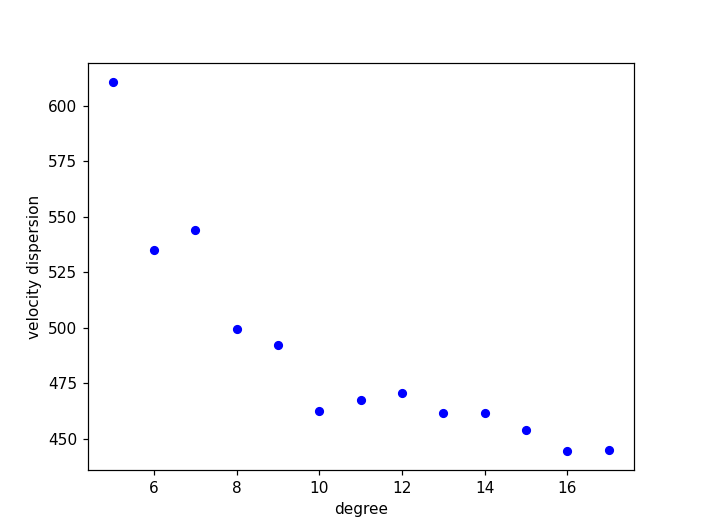

In [33]:
spec.plot_veldis()


degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      -173      1000    -0.224     0.158
chi2/DOF: 2.351; degree = 5; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 800


<IPython.core.display.Javascript object>


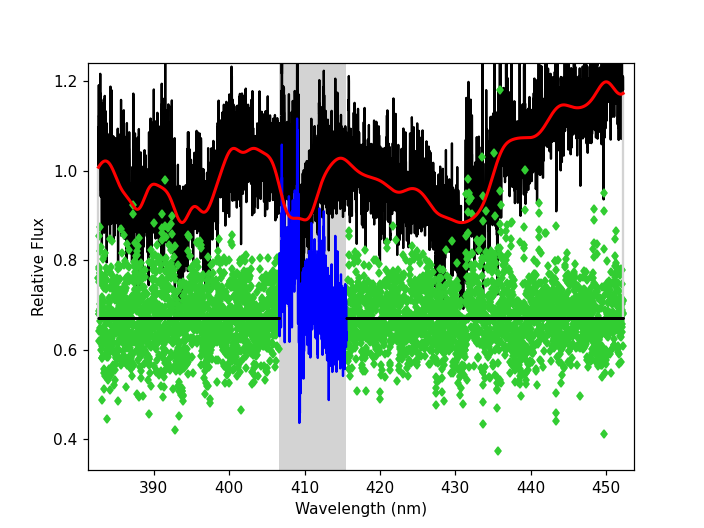


degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      -264      1000    -0.300     0.014
chi2/DOF: 2.301; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 800


<IPython.core.display.Javascript object>


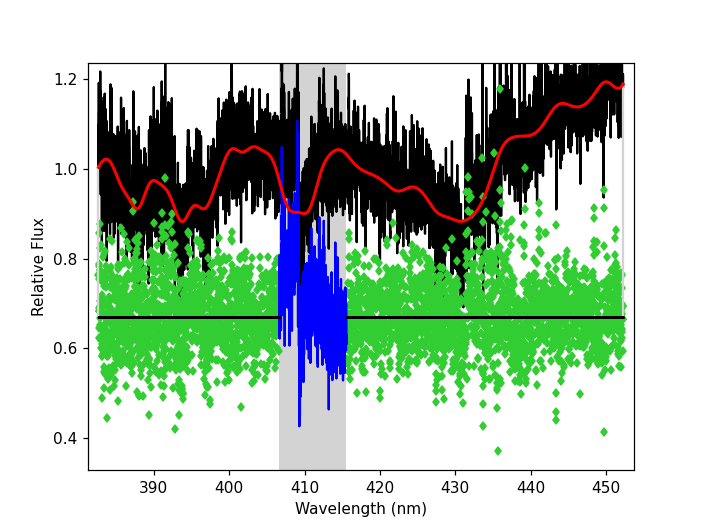


degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      -346      1000    -0.300    -0.028
chi2/DOF: 2.297; degree = 7; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 800


<IPython.core.display.Javascript object>


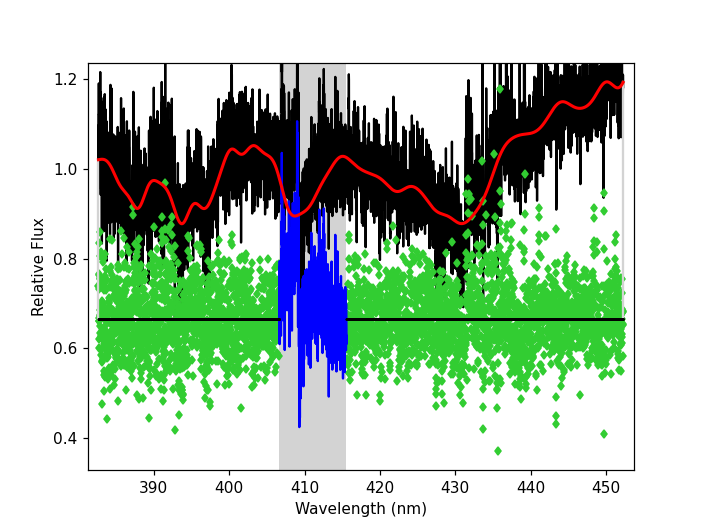


degree : 8
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      -255      1000    -0.300     0.040
chi2/DOF: 2.292; degree = 8; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 800


<IPython.core.display.Javascript object>


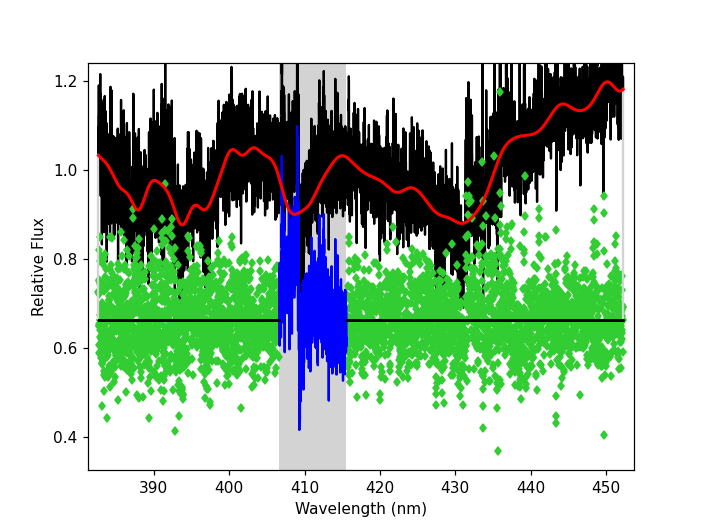


degree : 9
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      -222      1000    -0.300     0.030
chi2/DOF: 2.290; degree = 9; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 800


<IPython.core.display.Javascript object>


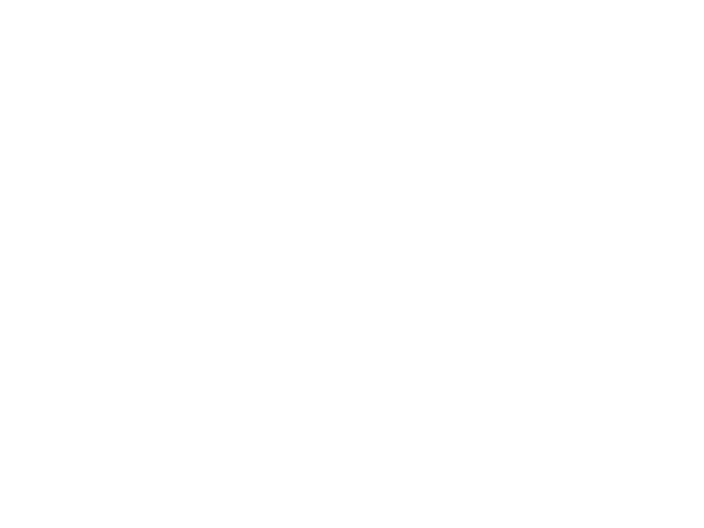

In [7]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 10], mask_reg=mask_reg, show_weight=True) #clean= True


degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:      -125      1000    -0.122     0.004
chi2/DOF: 2.501; degree = 5; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 62; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 800


<IPython.core.display.Javascript object>


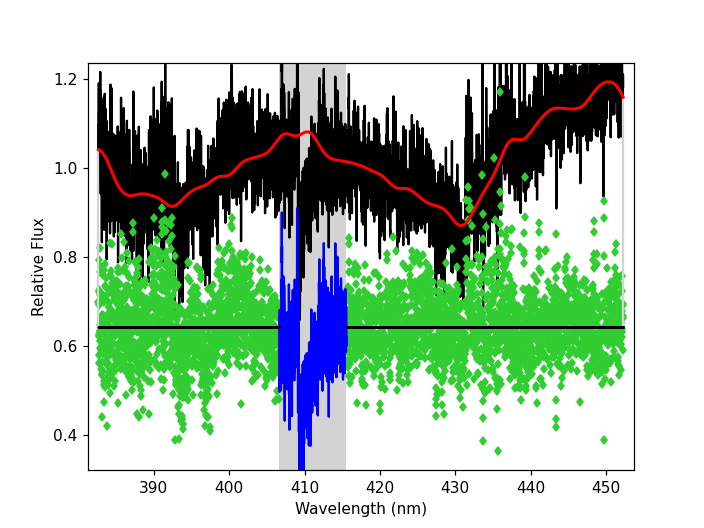


degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       257      1000    -0.041     0.042
chi2/DOF: 2.457; degree = 6; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 65; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 800


<IPython.core.display.Javascript object>


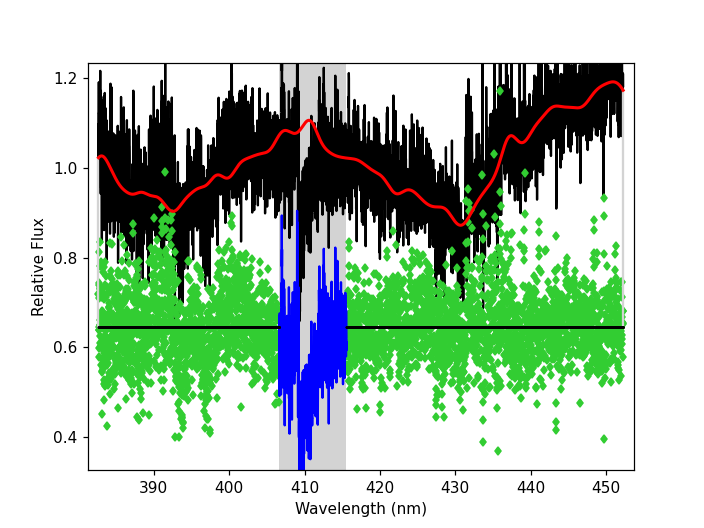


degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       357       759     0.010     0.024
chi2/DOF: 2.453; degree = 7; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 800


<IPython.core.display.Javascript object>


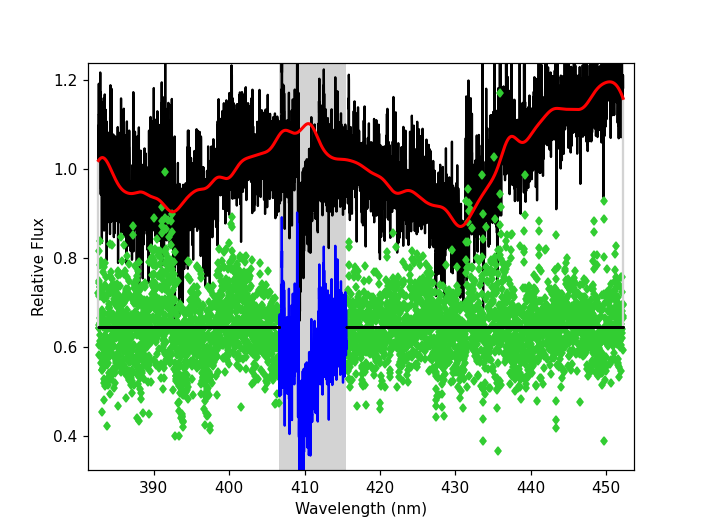


degree : 8
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       319       871    -0.016     0.049
chi2/DOF: 2.450; degree = 8; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 63; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 800


<IPython.core.display.Javascript object>


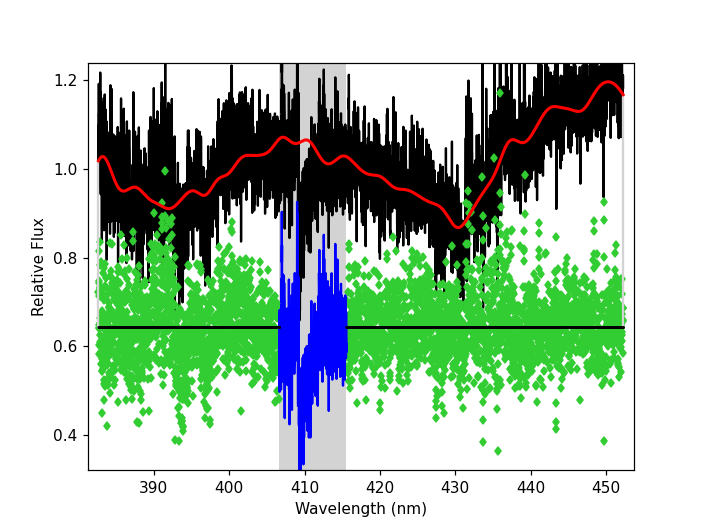


degree : 9
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       -79      1000    -0.121     0.023
chi2/DOF: 2.439; degree = 9; mdegree = 0
method = capfit; Jac calls: 14; Func calls: 72; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 800


<IPython.core.display.Javascript object>


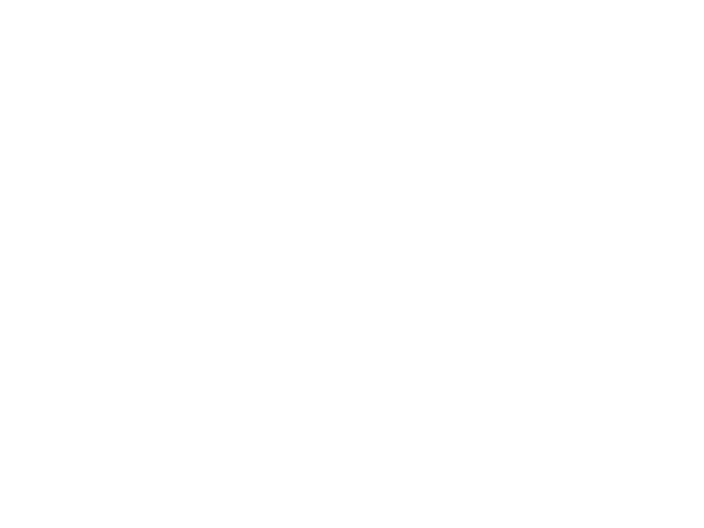

In [8]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 10], mask_reg=mask_reg, show_weight=True) #clean= True


degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:        95       387     0.079     0.149
chi2/DOF: 2.222; degree = 5; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 47; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 800


<IPython.core.display.Javascript object>


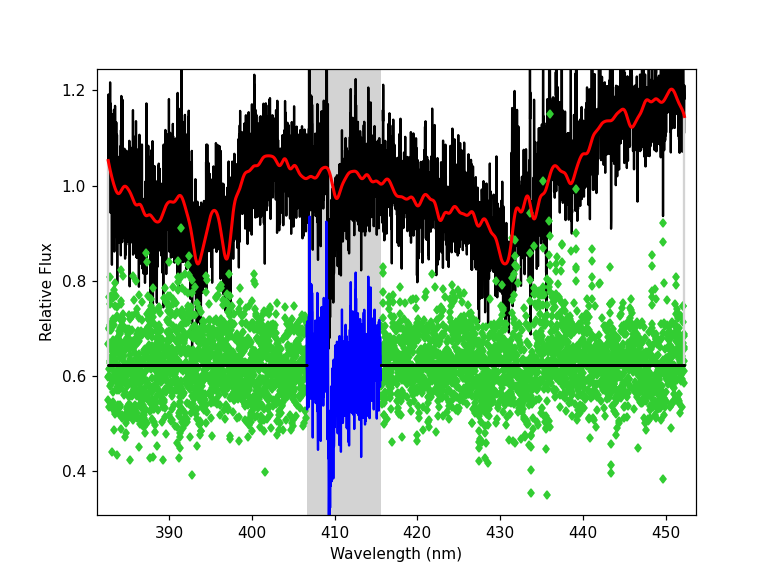

<IPython.core.display.Javascript object>


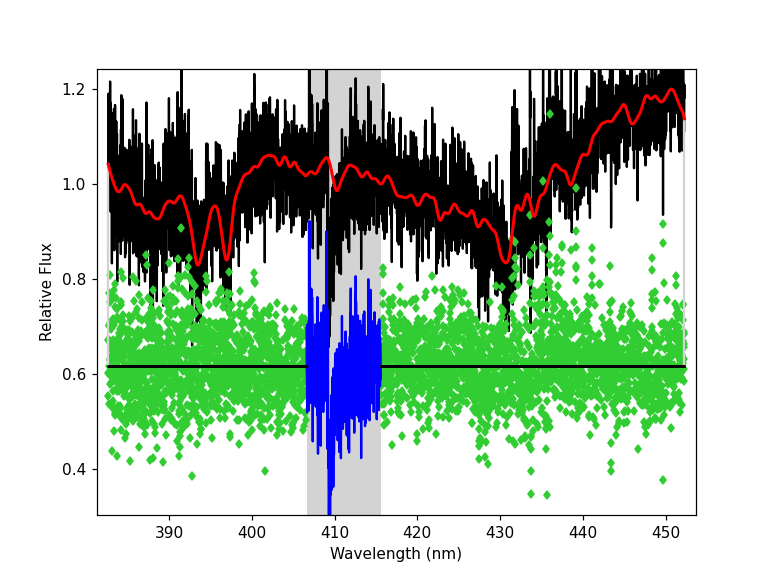


degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       106       328     0.107     0.088
chi2/DOF: 2.223; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 800


<IPython.core.display.Javascript object>


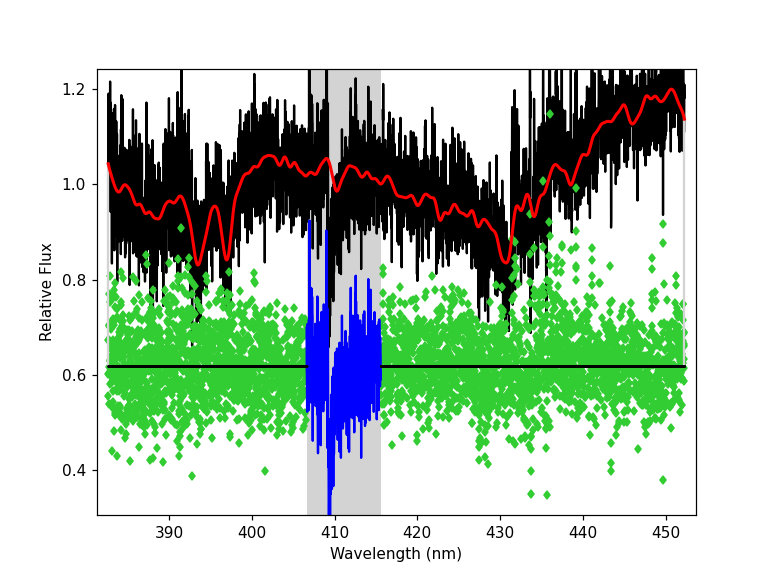


degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       105       331     0.106     0.094
chi2/DOF: 2.223; degree = 7; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 800


<IPython.core.display.Javascript object>


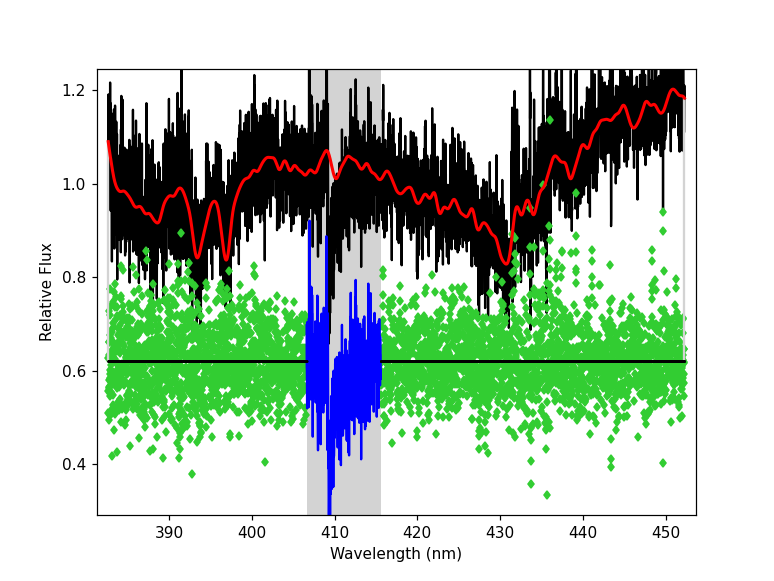


degree : 8
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       -49       293     0.101     0.058
chi2/DOF: 2.158; degree = 8; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 37; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 800


<IPython.core.display.Javascript object>


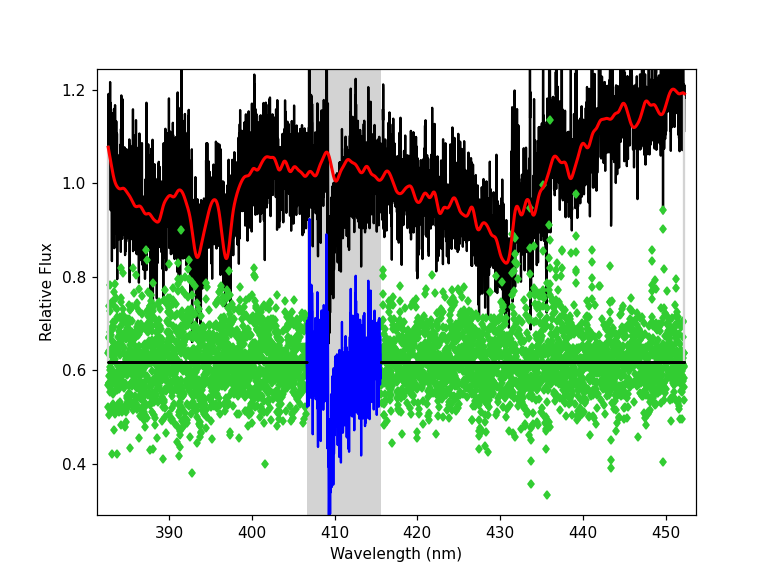


degree : 9
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       -44       279     0.103     0.047
chi2/DOF: 2.156; degree = 9; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 28; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 800


<IPython.core.display.Javascript object>


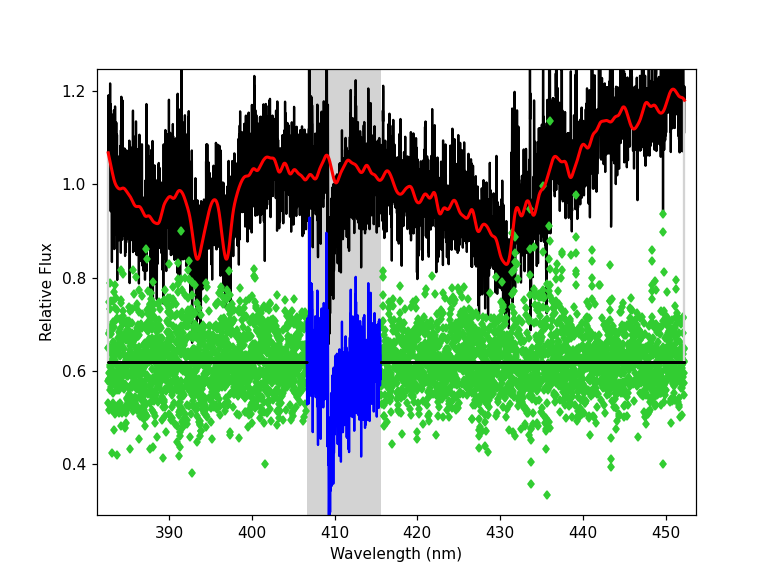


degree : 10
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       -38       280     0.109     0.054
chi2/DOF: 2.153; degree = 10; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 29; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  9 / 800


<IPython.core.display.Javascript object>


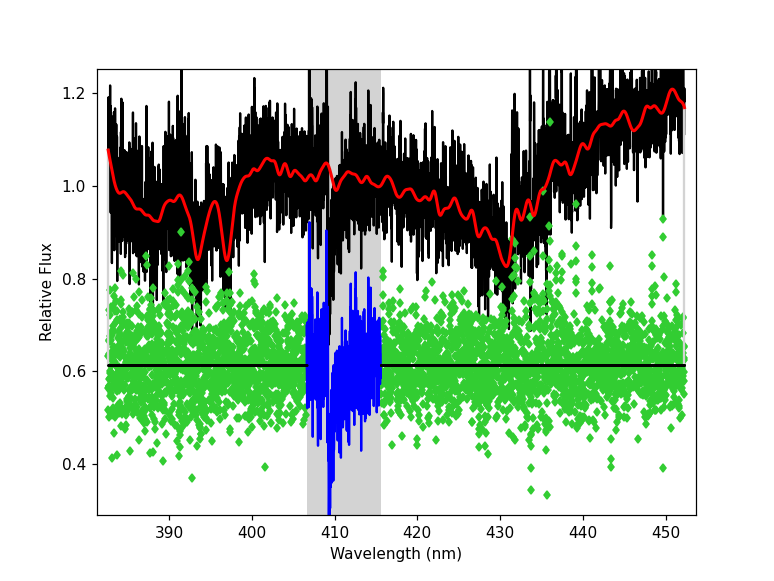


degree : 11
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:        83       256     0.077     0.003
chi2/DOF: 2.149; degree = 11; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 800


<IPython.core.display.Javascript object>


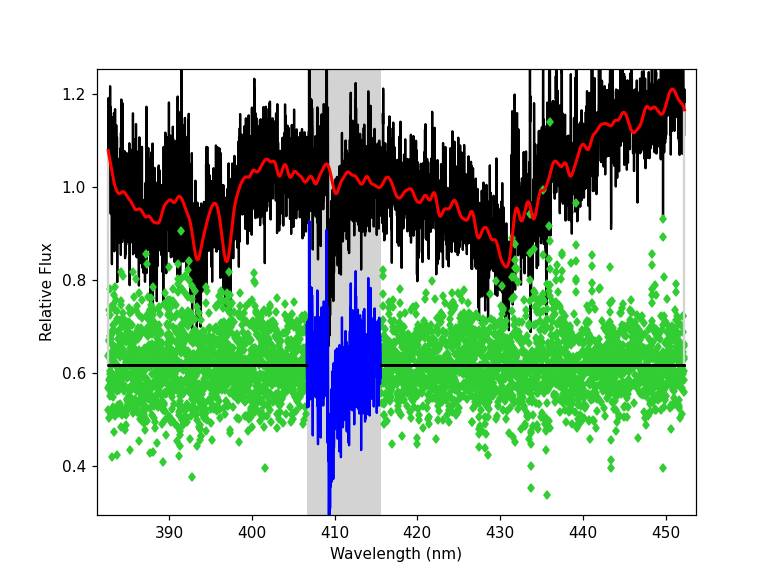


degree : 12
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:        19       234     0.083     0.004
chi2/DOF: 2.150; degree = 12; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 25; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 800


<IPython.core.display.Javascript object>


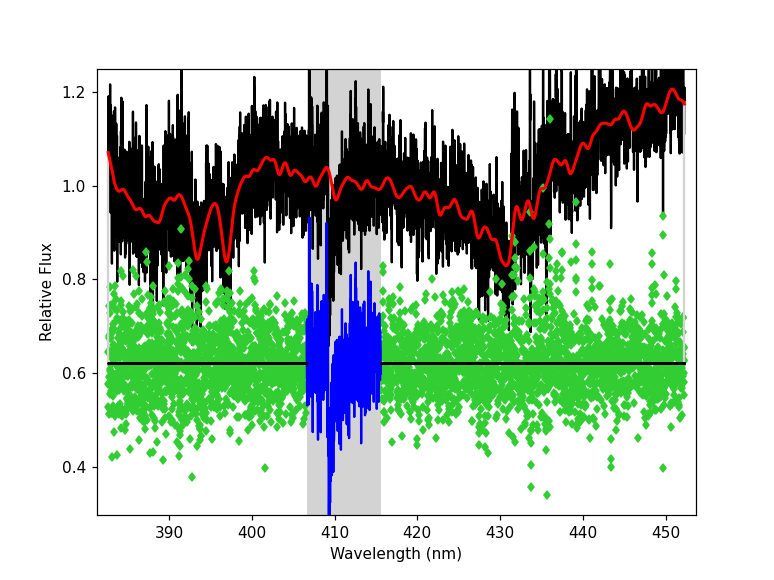


degree : 13
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:         2       230     0.085    -0.003
chi2/DOF: 2.149; degree = 13; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 25; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 800


<IPython.core.display.Javascript object>


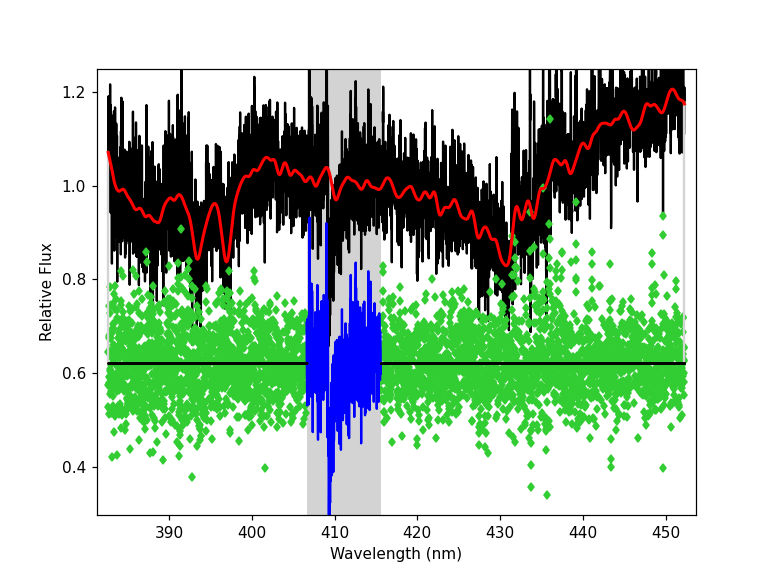


degree : 14
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:         3       230     0.085    -0.003
chi2/DOF: 2.149; degree = 14; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 25; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 800


<IPython.core.display.Javascript object>


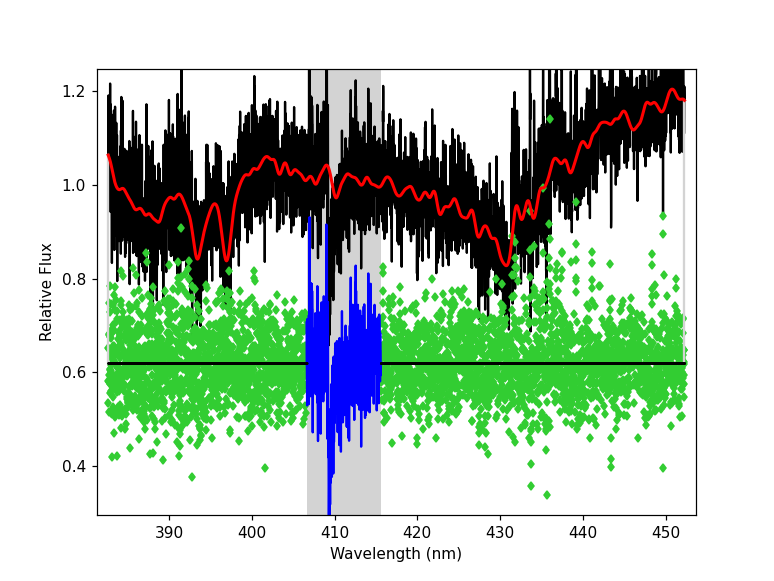


degree : 15
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:         8       233     0.082    -0.002
chi2/DOF: 2.148; degree = 15; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 25; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 800


<IPython.core.display.Javascript object>


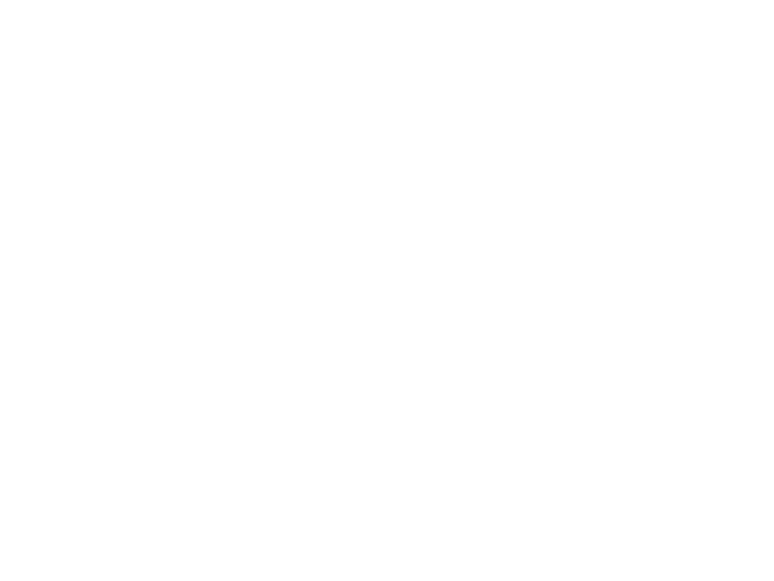

In [7]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 16], mask_reg=mask_reg, show_weight=True) #clean= True

<IPython.core.display.Javascript object>


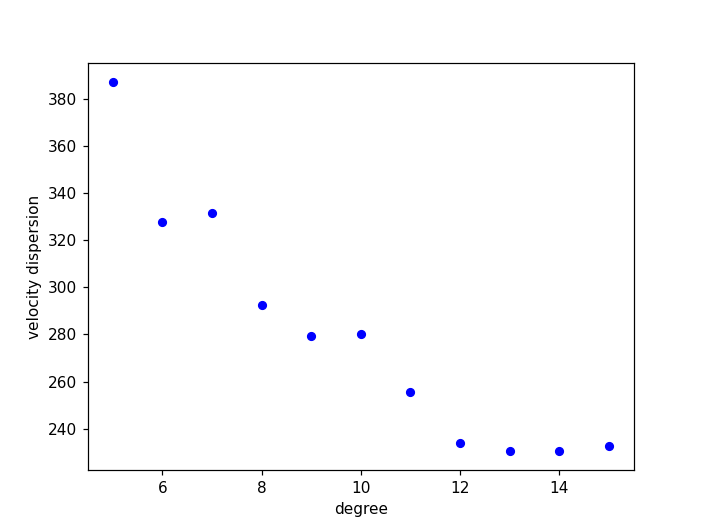

In [8]:
spec.plot_veldis()


degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       108       445     0.051     0.168
chi2/DOF: 2.218; degree = 5; mdegree = 0
method = capfit; Jac calls: 14; Func calls: 74; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1272


<IPython.core.display.Javascript object>


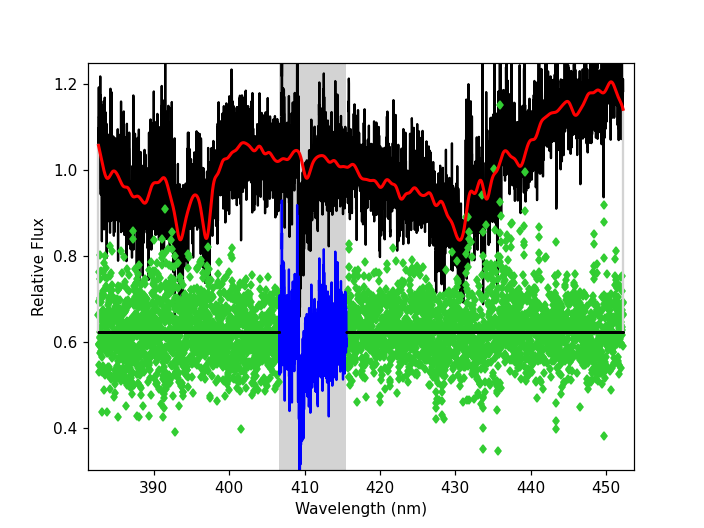

<IPython.core.display.Javascript object>


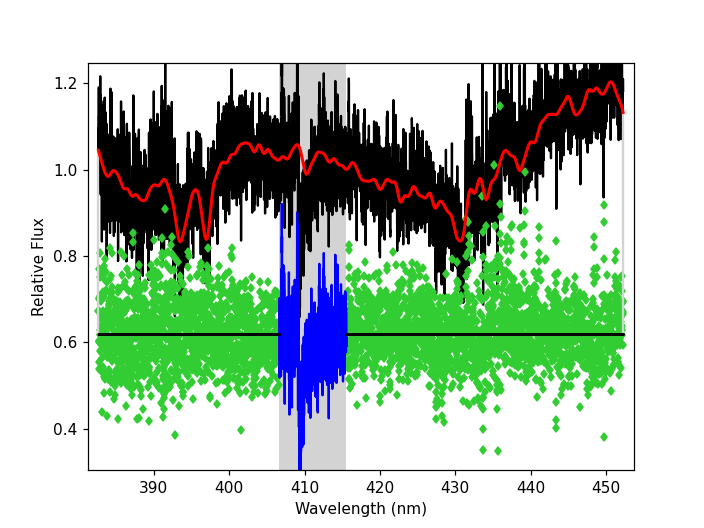


degree : 6
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       108       342     0.115     0.086
chi2/DOF: 2.220; degree = 6; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 39; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272


<IPython.core.display.Javascript object>


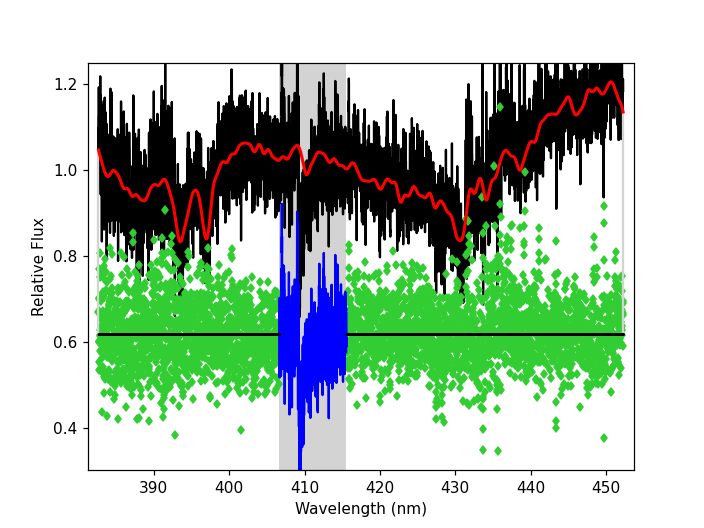


degree : 7
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       108       346     0.104     0.108
chi2/DOF: 2.220; degree = 7; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 54; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272


<IPython.core.display.Javascript object>


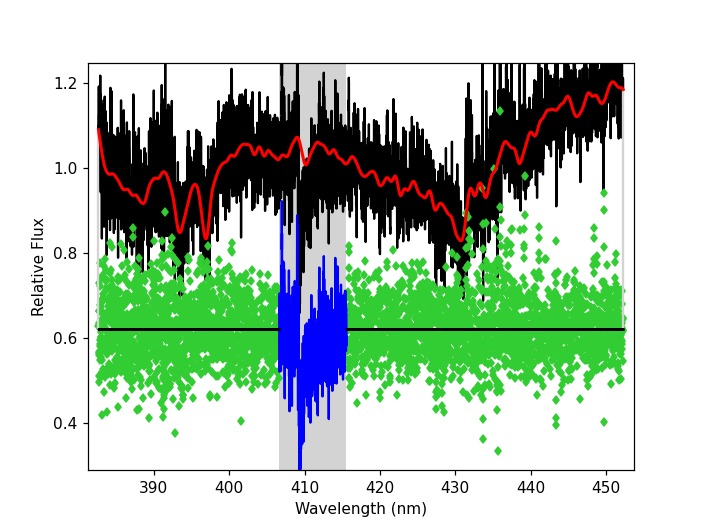


degree : 8
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       -44       298     0.104     0.075
chi2/DOF: 2.157; degree = 8; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 34; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1272


<IPython.core.display.Javascript object>


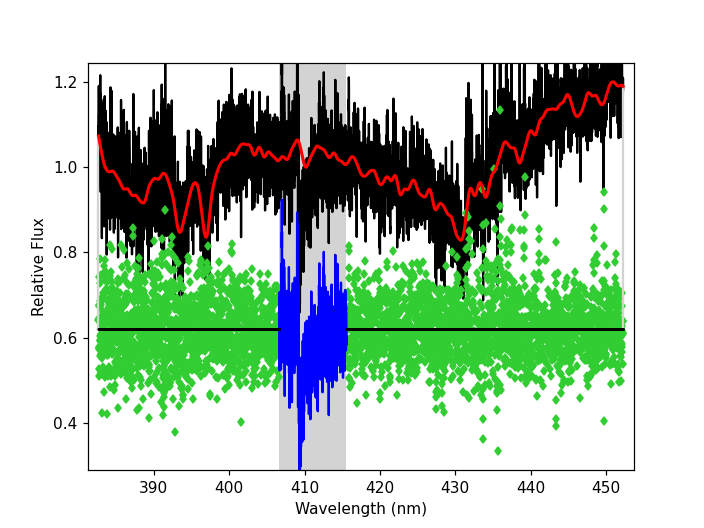


degree : 9
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       -42       290     0.106     0.059
chi2/DOF: 2.155; degree = 9; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 28; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272


<IPython.core.display.Javascript object>


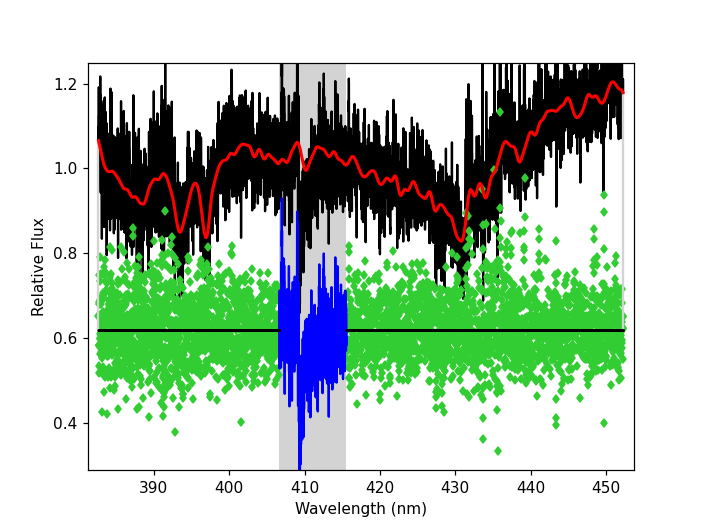


degree : 10
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       -39       302     0.120     0.068
chi2/DOF: 2.150; degree = 10; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 38; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1272


<IPython.core.display.Javascript object>


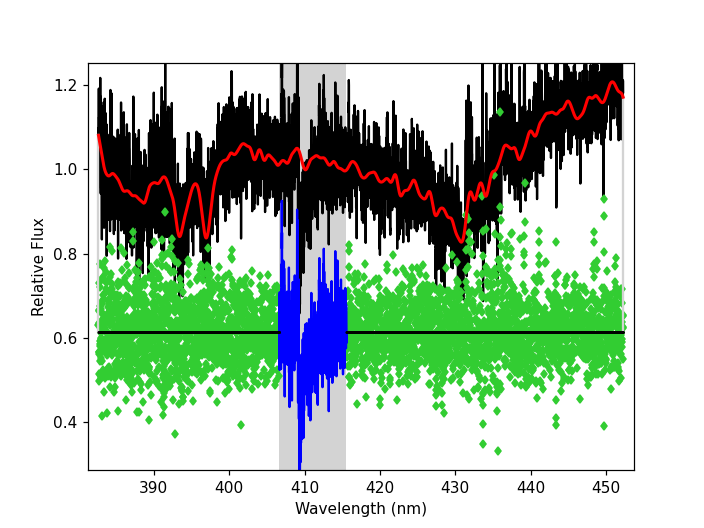


degree : 11
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       103       268     0.096     0.021
chi2/DOF: 2.145; degree = 11; mdegree = 0
method = capfit; Jac calls: 8; Func calls: 46; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272


<IPython.core.display.Javascript object>


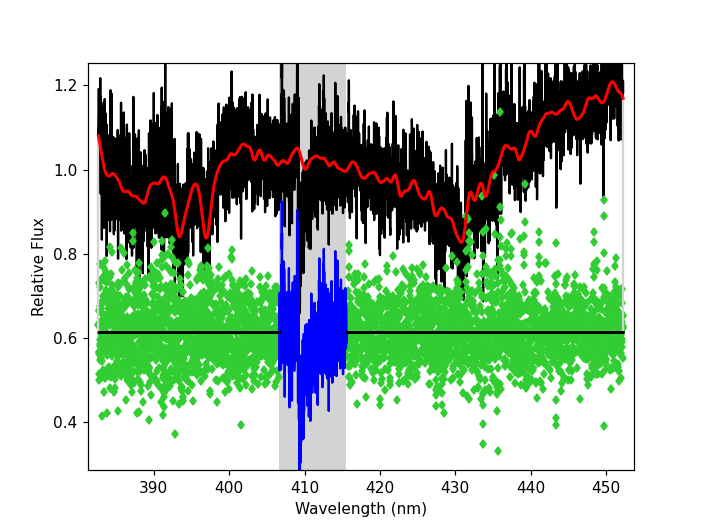


degree : 12
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:       102       268     0.097     0.015
chi2/DOF: 2.145; degree = 12; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 50; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1272


<IPython.core.display.Javascript object>


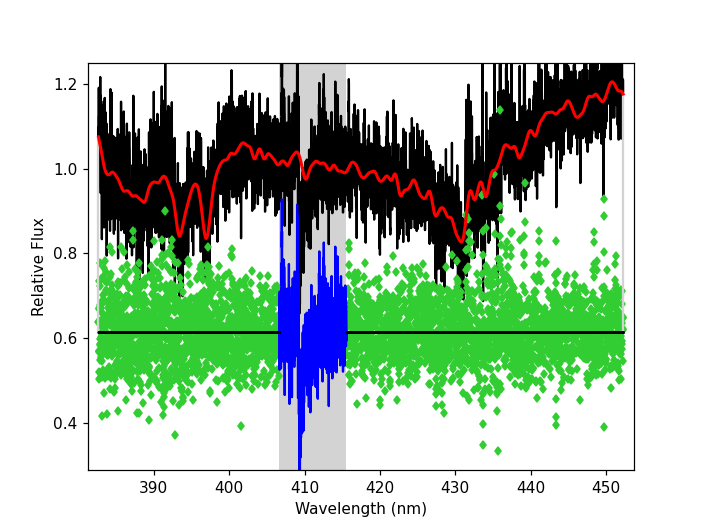


degree : 13
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:        96       261     0.093     0.008
chi2/DOF: 2.145; degree = 13; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1272


<IPython.core.display.Javascript object>


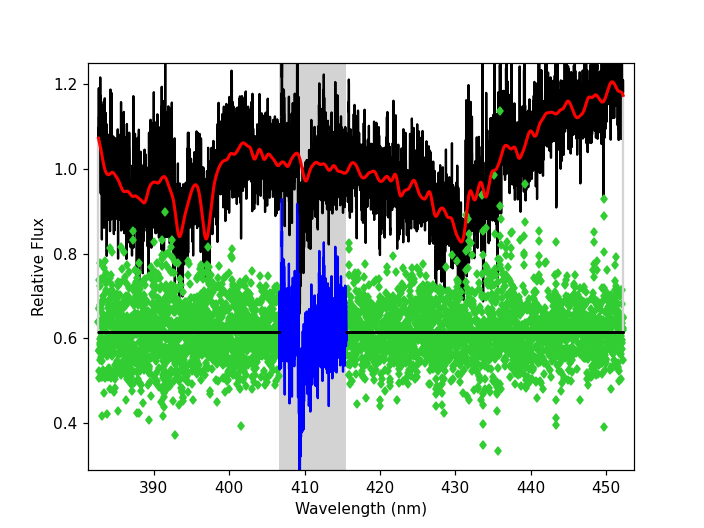


degree : 14
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:        97       260     0.093     0.006
chi2/DOF: 2.145; degree = 14; mdegree = 0
method = capfit; Jac calls: 9; Func calls: 51; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1272


<IPython.core.display.Javascript object>


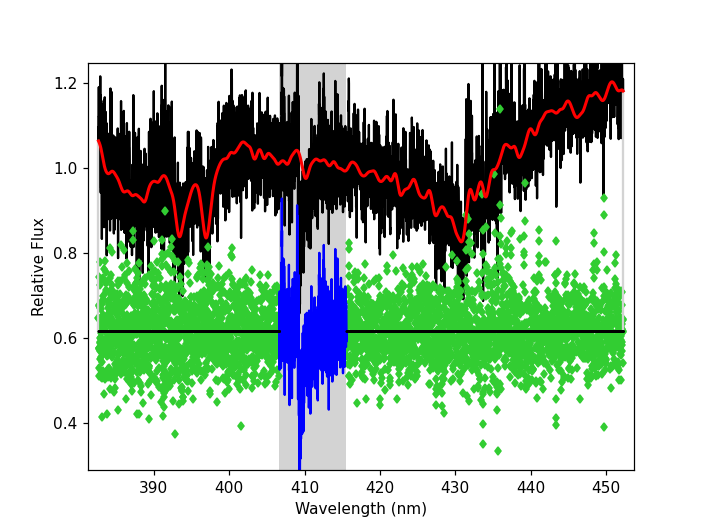


degree : 15
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:        96       259     0.095     0.004
chi2/DOF: 2.144; degree = 15; mdegree = 0
method = capfit; Jac calls: 7; Func calls: 42; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1272


<IPython.core.display.Javascript object>


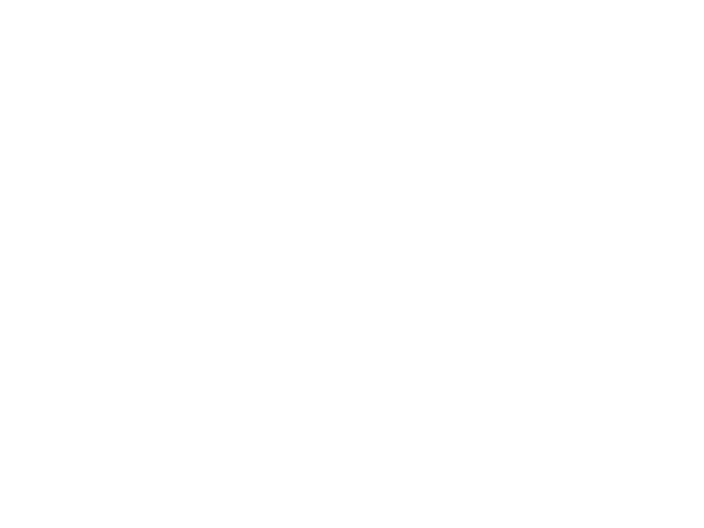

In [8]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 16], mask_reg=mask_reg, show_weight=True) #clean= True

<IPython.core.display.Javascript object>


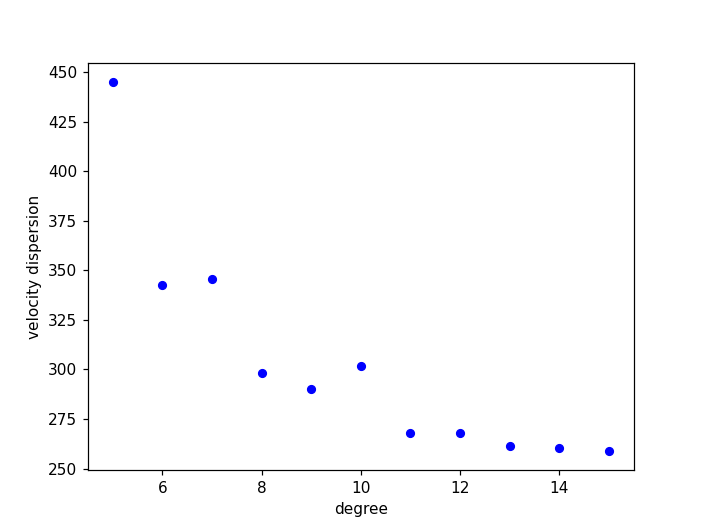

In [9]:
spec.plot_veldis()